<a href="https://colab.research.google.com/github/Phantasm320/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

# Storytelling with Data

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [101]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [102]:
len(df['Occupation'].unique())

4

In [103]:
df['Occupation'].value_counts()

Acting, Comedy & Music     1203
Media                       756
Government and Politics     384
Other                       350
Name: Occupation, dtype: int64

In [104]:
df.isnull().sum()

Year                          0
GoogleKnowlege_Occupation    26
Show                          0
Group                        31
Guest                         0
Occupation                    0
dtype: int64

In [105]:
len(df['Year'].unique())

17

In [106]:
df_years = df.groupby(['Year', 'Occupation'])
df_years.size()

Year  Occupation             
1999  Acting, Comedy & Music     150
      Government and Politics      2
      Media                       11
      Other                        3
2000  Acting, Comedy & Music     125
      Government and Politics     14
      Media                       21
      Other                        9
2001  Acting, Comedy & Music     114
      Government and Politics      6
      Media                       31
      Other                        6
2002  Acting, Comedy & Music      99
      Government and Politics     11
      Media                       42
      Other                        7
2003  Acting, Comedy & Music      93
      Government and Politics     17
      Media                       41
      Other                       15
2004  Acting, Comedy & Music      63
      Government and Politics     37
      Media                       45
      Other                       19
2005  Acting, Comedy & Music      60
      Government and Politics     26
      Me

In [107]:
df_year = df.groupby('Year')
df_year.get_group(1999)['Occupation'].value_counts()

Acting, Comedy & Music     150
Media                       11
Other                        3
Government and Politics      2
Name: Occupation, dtype: int64

In [108]:
for num in df_year.get_group(1999)['Occupation'].value_counts():
  print(num / df_year.get_group(1999)['Occupation'].value_counts().sum() * 100)

90.36144578313254
6.626506024096386
1.8072289156626504
1.2048192771084338


In [0]:
occupations = ['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other']

In [110]:
for group, data in df_year:
  print(group)
  for num in data['Occupation'].value_counts():
    print(num / data['Occupation'].value_counts().sum() * 100)
  

1999
90.36144578313254
6.626506024096386
1.8072289156626504
1.2048192771084338
2000
73.96449704142012
12.42603550295858
8.284023668639055
5.325443786982249
2001
72.61146496815286
19.745222929936308
3.821656050955414
3.821656050955414
2002
62.264150943396224
26.41509433962264
6.918238993710692
4.40251572327044
2003
56.024096385542165
24.69879518072289
10.240963855421686
9.036144578313253
2004
38.41463414634146
27.439024390243905
22.5609756097561
11.585365853658537
2005
37.03703703703704
33.33333333333333
16.049382716049383
13.580246913580247
2006
36.024844720496894
29.19254658385093
19.25465838509317
15.527950310559005
2007
33.33333333333333
25.53191489361702
24.113475177304963
17.02127659574468
2008
46.95121951219512
20.73170731707317
20.121951219512198
12.195121951219512
2009
36.19631901840491
22.085889570552148
20.858895705521473
20.858895705521473
2010
35.15151515151515
30.303030303030305
18.181818181818183
16.363636363636363
2011
33.74233128834356
31.28834355828221
18.4049079754601

In [111]:
df_year['Occupation'].value_counts()

Year  Occupation             
1999  Acting, Comedy & Music     150
      Media                       11
      Other                        3
      Government and Politics      2
2000  Acting, Comedy & Music     125
      Media                       21
      Government and Politics     14
      Other                        9
2001  Acting, Comedy & Music     114
      Media                       31
      Government and Politics      6
      Other                        6
2002  Acting, Comedy & Music      99
      Media                       42
      Government and Politics     11
      Other                        7
2003  Acting, Comedy & Music      93
      Media                       41
      Government and Politics     17
      Other                       15
2004  Acting, Comedy & Music      63
      Media                       45
      Government and Politics     37
      Other                       19
2005  Acting, Comedy & Music      60
      Media                       54
      Go

# Part 2 — Recreate this explanatory visualization:

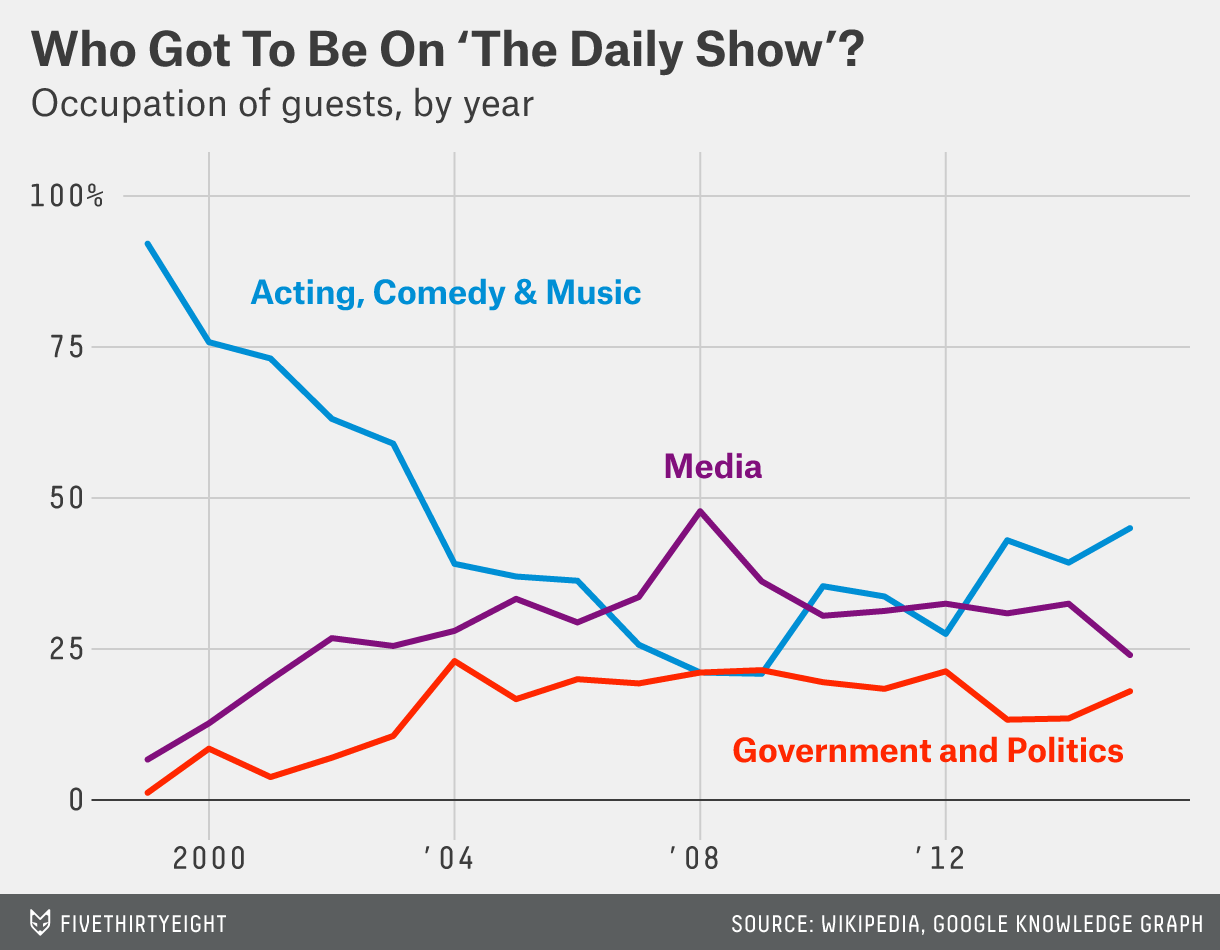

In [112]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hint:** use the crosstab you calculated in part 1!

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






No handles with labels found to put in legend.


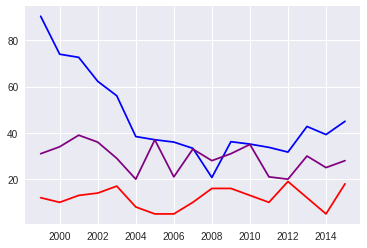

In [113]:
years = [x for x in range(1999, 2016)]
percent_acm = [90.36, 73.96, 72.61, 62.26, 56.02, 38.41, 37.03, 36.02, 33.33, 20.73, 36.19, 35.15, 33.74, 31.70, 42.77, 39.26, 45]
percent_m = [np.random.randint(20, 40) for x in range(17)]
percent_gp = [np.random.randint(5, 20) for x in range(17)]
plt.plot(final.index, percent_acm, color = 'blue')
plt.plot(final.index, percent_m, color = 'purple')
plt.plot(final.index, percent_gp, color = 'red');
plt.legend()

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

If you want, you can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [114]:
top_10 = df['Guest'].value_counts().head(10)
top_10

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Ricky Gervais     13
Paul Rudd         13
Tom Brokaw        12
Bill O'Reilly     10
Richard Lewis     10
Reza Aslan        10
Will Ferrell      10
Name: Guest, dtype: int64

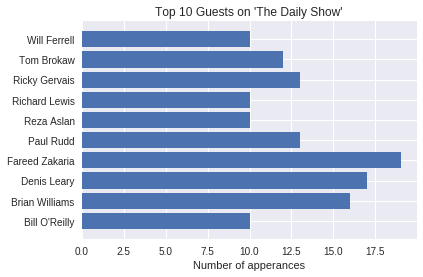

In [115]:
plt.barh(y = top_10.index, width = top_10.values)
plt.title("Top 10 Guests on 'The Daily Show'")
plt.xlabel('Number of apperances');

In [0]:
plt.barh?

In [125]:
final = pd.crosstab(index = df['Year'], columns = df['Occupation'], normalize = 'index')
final

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


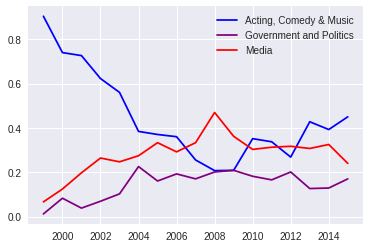

In [127]:

percent_acm = final['Acting, Comedy & Music']
percent_m = final['Government and Politics']
percent_gp = final['Media']
plt.plot(final.index, percent_acm, color = 'blue')
plt.plot(final.index, percent_m, color = 'purple')
plt.plot(final.index, percent_gp, color = 'red')
plt.legend(final.columns);